In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/train1 (2).csv')

# 1.Data preprocessing and EDA

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
na_df = (df.isnull().sum() / len(df)) * 100      
na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=True).to_frame().reset_index().rename(columns={0:'Observations','index':'Columns'})
na_df['to_delete']  = np.where(na_df['Observations'] >= 50, 'Yes', 'No')
fig = px.bar(na_df, x= 'Observations' , y='Columns', title = 'Null values Ratio in %', color="to_delete")
fig.add_vline(x=50, line_dash="dash", line_color="grey", annotation_text="50", annotation_position="bottom")
fig.show()

In [ ]:
#droping columns as there are more thasn 50% null values
df.drop('Alley',axis=1,inplace=True)
df.drop('MiscFeature',axis=1,inplace=True)
df.drop('Fence',axis=1,inplace=True)
df.drop('PoolQC',axis=1,inplace=True)

In [ ]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['GarageFinish'] =df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<Axes: title={'center': 'House Price by The general zoning classification'}, xlabel='MSZoning', ylabel='Price'>

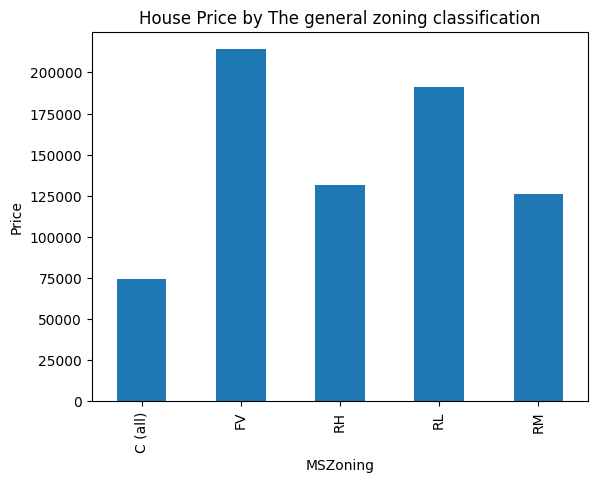

In [ ]:
df.groupby("MSZoning")["SalePrice"].mean().plot(kind="bar",ylabel="Price",title="House Price by The general zoning classification")

<Axes: title={'center': 'House Price by Type of heating'}, xlabel='Type of heating', ylabel='Price'>

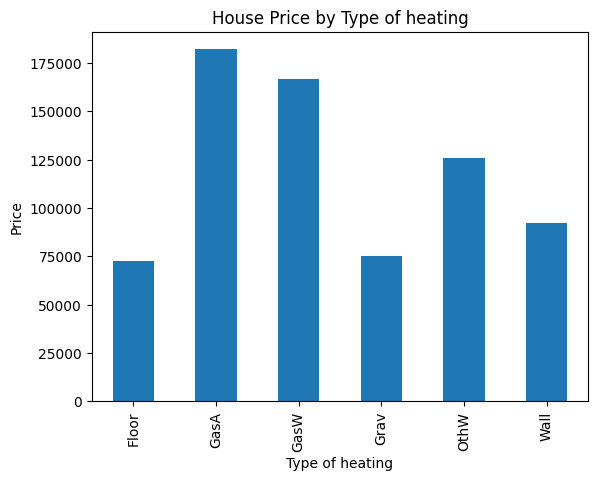

In [ ]:
df.groupby("Heating")["SalePrice"].mean().plot(kind="bar",xlabel="Type of heating",ylabel="Price",title="House Price by Type of heating")

<Axes: title={'center': 'House Price by Garage Type '}, xlabel='Garage Type', ylabel='Price'>

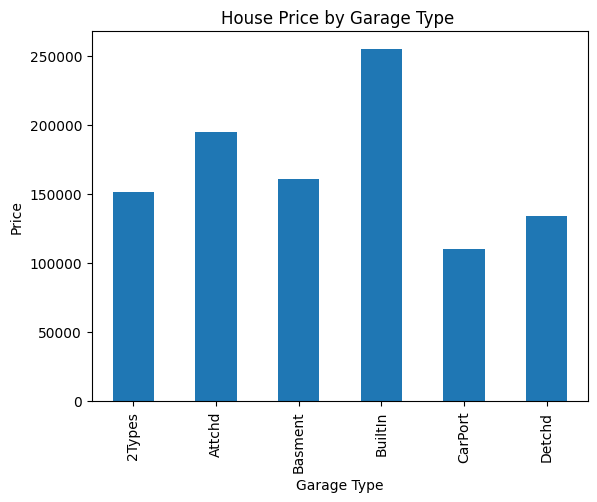

In [ ]:
df.groupby("GarageType",dropna=False)["SalePrice"].mean().plot(kind="bar",xlabel="Garage Type",ylabel="Price",title="House Price by Garage Type ")

<Axes: title={'center': 'House Price by Kitchen quality '}, xlabel='Kitchen quality', ylabel='Price'>

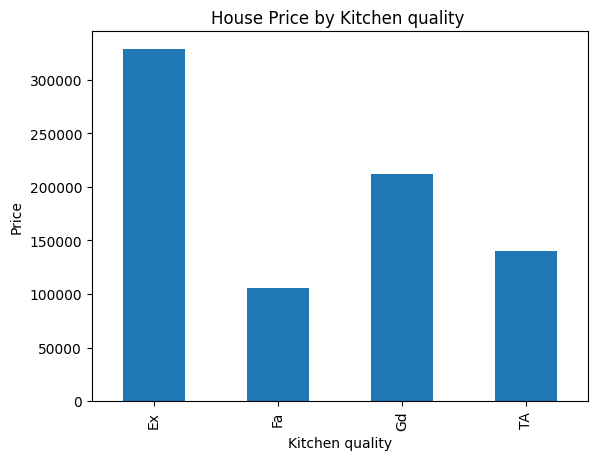

In [ ]:
df.groupby("KitchenQual",dropna=False)["SalePrice"].mean().plot(kind="bar",xlabel="Kitchen quality",ylabel="Price",title="House Price by Kitchen quality ")

In [ ]:
#Filter out all numerical variables
numeric_features = df.dtypes[df.dtypes != "object"].index

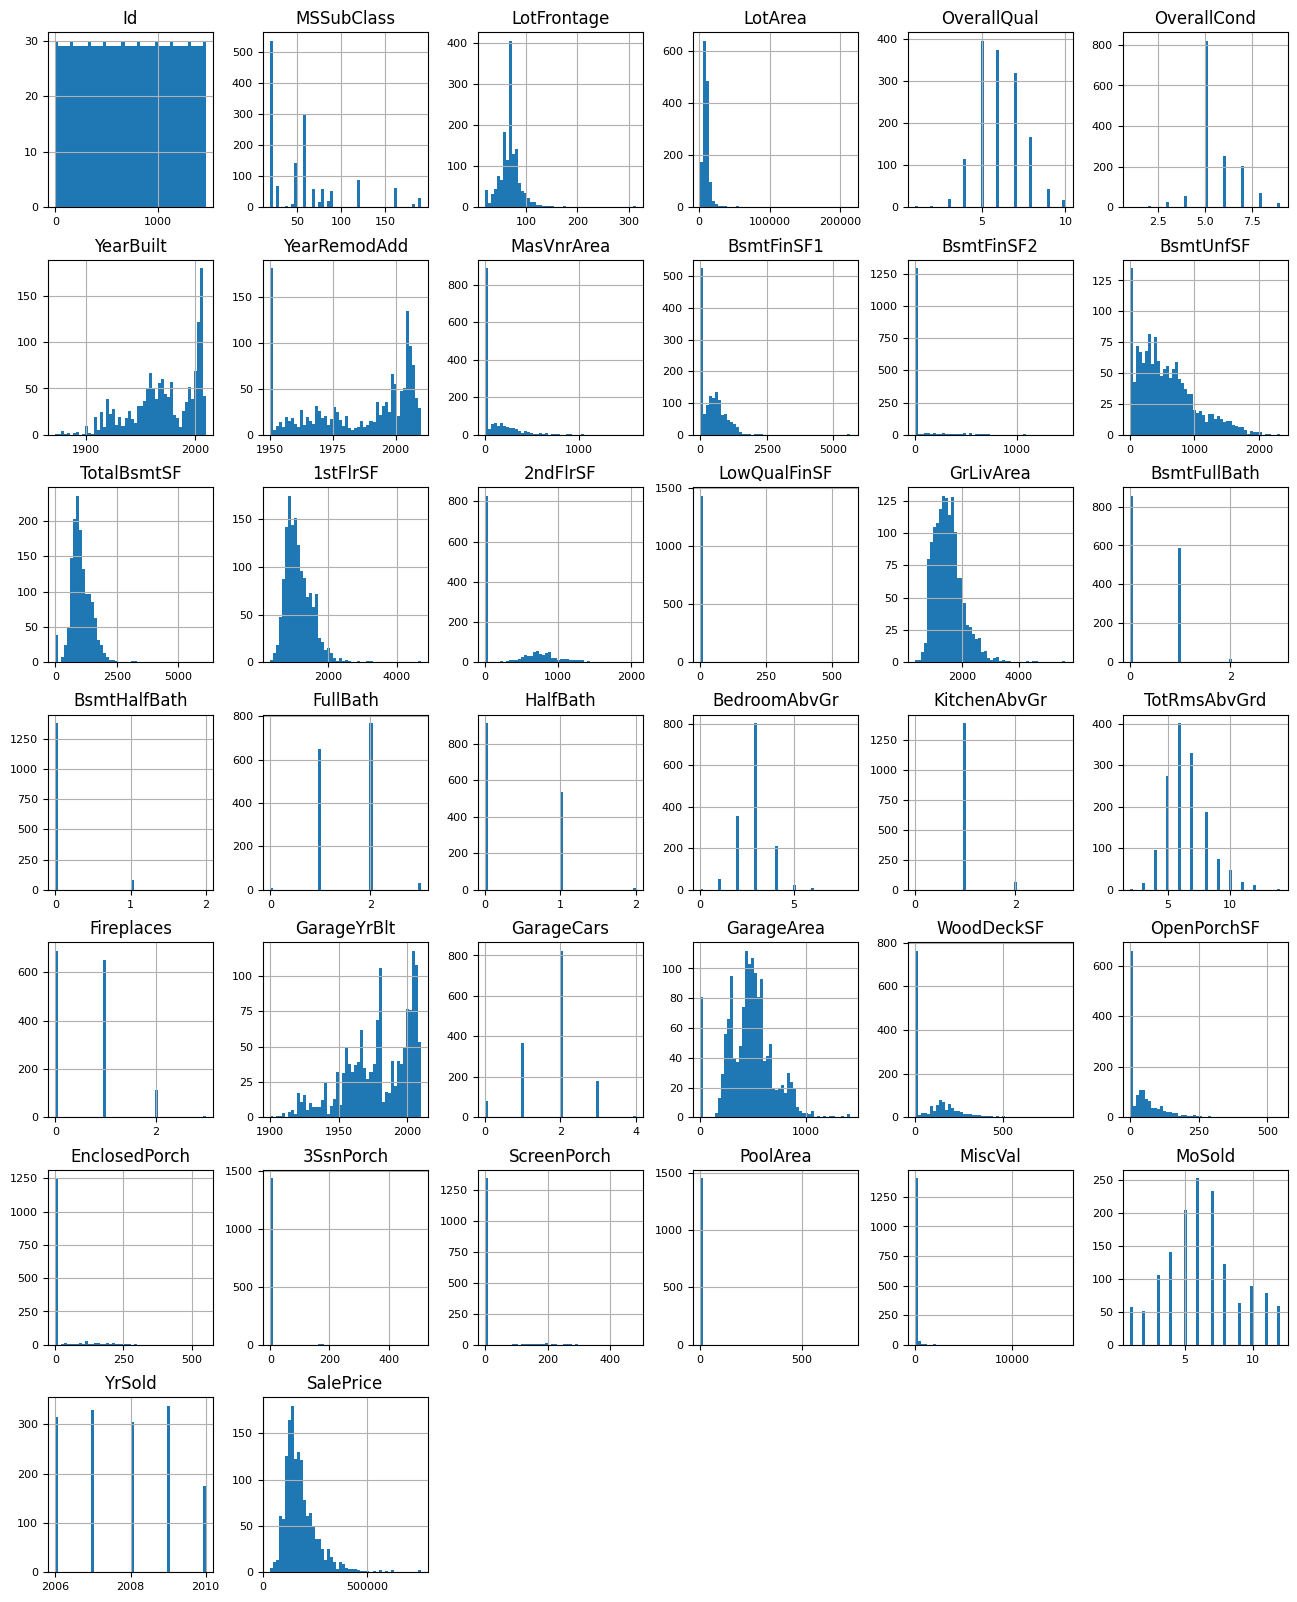

In [ ]:
df[numeric_features].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Visualize the relationship between the target variable and the categorical features using boxplots:

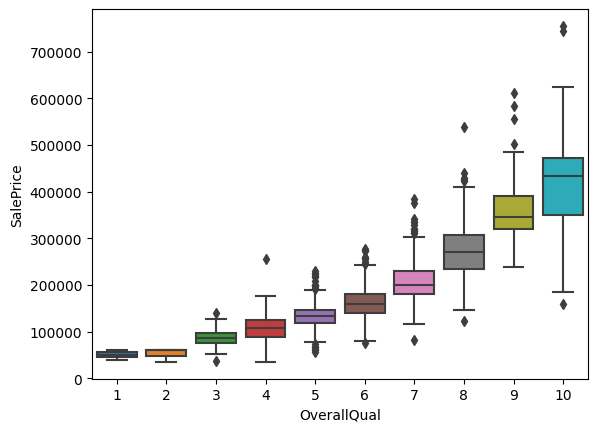

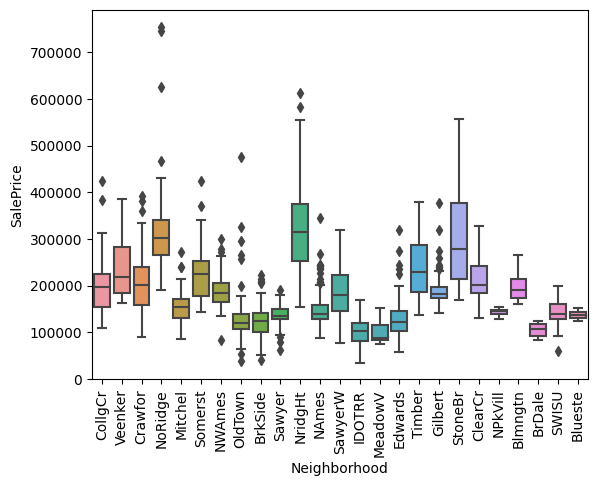

In [ ]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.show()

Computing the correlation matrix and visualize it using a heatmap:

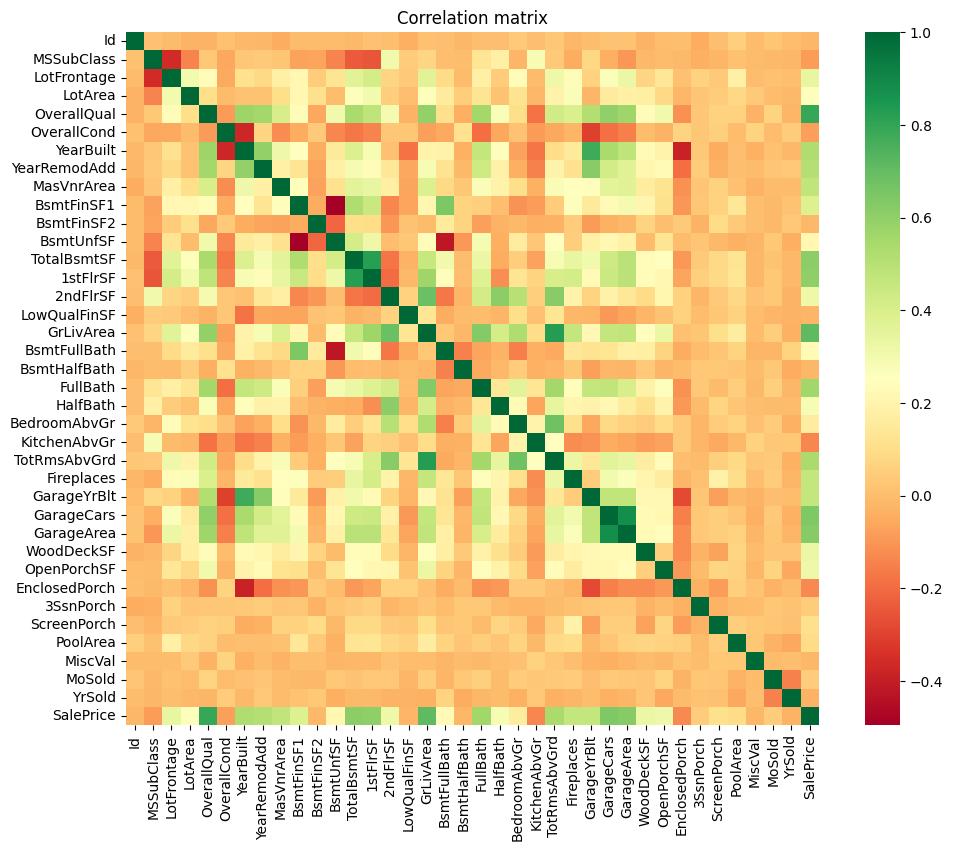

In [ ]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap using pandas
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap="RdYlGn", annot=False, square=True)
plt.title("Correlation matrix")
plt.show()

Computng the correlation between the target variable and the numerical features and visualize it using a bar chart

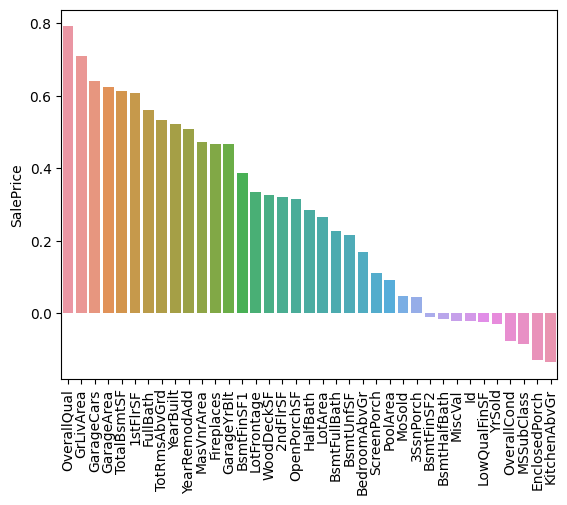

In [ ]:
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)[1:]
sns.barplot(x=corr_with_target.index, y=corr_with_target)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["SalePrice"] = np.log(df["SalePrice"])

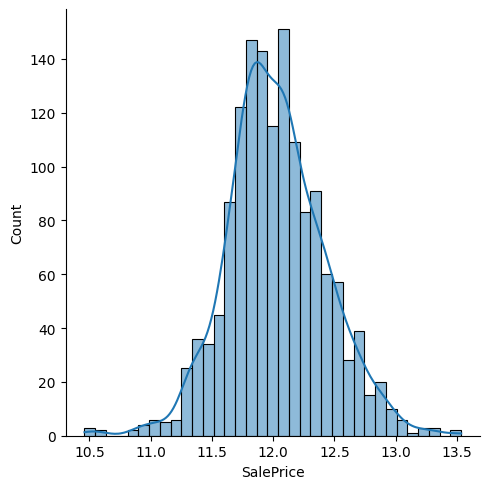

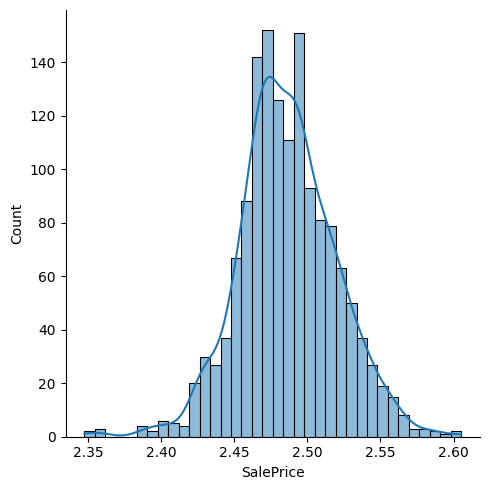

In [ ]:
sns.displot(df["SalePrice"],kde=True)
sns.displot(np.log(df["SalePrice"]),kde=True)

Do the same for all numerical varaibles

Numerical data distribution
We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

**Feature Scaling**

In [ ]:
from scipy.stats import skew
#Filter out all numerical variables
numeric_features = df.dtypes[df.dtypes != "object"].index

#Calculate skewness
skew_scores = df[numeric_features].apply(lambda x: skew(x.dropna()))

#Filer out severe skew variables
skew_features = skew_scores[skew_scores > 1].index

#Log transformation variables with severe skewness
df[skew_features] = np.log1p(df[skew_features])

**Feature Encoding**

In [ ]:
df= pd.get_dummies(df)

In [ ]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,...,0,0,0,1,0,0,0,0,1,0
1,2,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,...,0,0,0,1,0,0,0,0,1,0
2,3,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,...,0,0,0,1,0,0,0,0,1,0
3,4,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,...,0,0,0,1,1,0,0,0,0,0
4,5,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df.shape

(1460, 277)

**Outlier treatment**

<Axes: xlabel='SalePrice'>

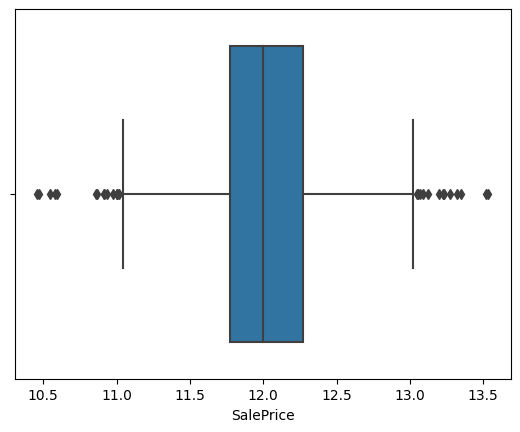

In [ ]:
# Check for outliers in SalePrice
sns.boxplot(x=df['SalePrice'])


In [ ]:
#finding quartiles and interquartile range
q1=df["SalePrice"].quantile(0.25)
q3=df["SalePrice"].quantile(0.75)
iqr=q3-q1
iqr,q1,q3

(0.49863394626102675, 11.775097347742962, 12.273731294003989)

In [ ]:
upper_limit=q3+1.5*iqr
lower_limit=q1- 1.5*iqr
upper_limit,lower_limit

(13.021682213395529, 11.027146428351422)

In [ ]:
def limit_imputer(value):
  if value>upper_limit:
    return upper_limit
  if value<lower_limit:
    return lower_limit
  else:
    return value

In [ ]:
df['SalePrice']=df['SalePrice'].apply(limit_imputer)

In [ ]:
df['SalePrice'].describe()

count    1460.000000
mean       12.024394
std         0.387014
min        11.027146
25%        11.775097
50%        12.001505
75%        12.273731
max        13.021682
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice'>

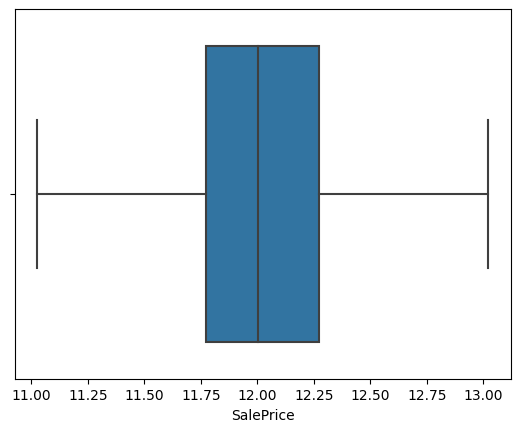

In [ ]:
sns.boxplot(x=df['SalePrice'])

**Implementing Linear Regression Model**

In [ ]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1022, 276), (438, 276), (1022,), (438,))

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
#Calculating regresion score between x_train and y_train
lr.score(x_train,y_train)

0.9473505821384461

In [ ]:
#Calculating regresion score between x_test and y_test
lr.score(x_test,y_test)

0.8690087801393105

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.08798900735678587
MSE: 0.019683797897022185
RMSE: 0.14029895900191913


In [ ]:
#Calculating r2score
metrics.r2_score(y_test, y_pred)

0.8690087801393105

**HyperParameter Tuning**

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats



# Split your data into features and target variable
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

# Normalize your input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Define the model
model = Ridge()

# Define the hyperparameter distribution to sample from
param_dist = {'alpha': stats.loguniform(1e-4, 100), 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'max_iter': stats.randint(1000, 10000)}

# Define the search object
search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Perform the search
result = search.fit(x_scaled, y)

# Print the best hyperparameters 
print('Best Parameters: ', result.best_params_)


Best Parameters:  {'alpha': 83.42988013047346, 'max_iter': 6463, 'solver': 'auto'}
